# Climate Change World Bank Dataset - Dominic Simpson


##### Exposition:
For this personal project, I have chosen a WorldBank dataset on climate change, covering world data for the period 1901-2023.

##### Guide to the data:
- tas_annual: Average Mean Surface Air Temperature - annual average air temperature at 2m above
- tasmax_annual: Average Maximum Temperature - average daily maximums each year
- tasmin_annual: Average Minimum Temperature - average daily minimums each year
- pr_annual: Average Precipitation - average precipitation each year


Analysis Questions:
- Does the data show that the combined average temperatures of all countries in the world has risen overall throughout the last 25 years (approx)?
- Can rising global temperatures be correlated with rising CO₂ emissions per capita?
- Has there been an inexorable increase in sea level rise throughout the world?
- Has there been an increase in extreme weather over the 25 year period?
- Can relationships be established between a countries' renewal energy program and forest area (both %), on the other, and average temperature, sea level rise, and extreme weather events on the other?


Hypotheses:
1. Countries throughout the world have seen a general rise in temperatures overall.
2. Rising global temperatures can be correlated with the trend for increasing CO₂ emissions per capita - despite attempts to bring down CO₂ levels.

Decide which column will be your target variable for Machine Learning

- Avg Temperature (Â°C) [_column name will be modified_]

In [28]:
# Testing testing
print("Hello World!")

Hello World!


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

3. **Data Cleaning & Transformation**


### Groups together different datasets together into one:

In [30]:
def load_wide_to_long(path, value_name):
    df = pd.read_csv(path)
    long = df.melt(id_vars=["code","name"], var_name="year", value_name=value_name)
    long["year"] = long["year"].str.extract(r"(\d{4})").astype(int)
    return long

tas = load_wide_to_long("data/tas_annual.csv", "tas")
tasmax = load_wide_to_long("data/tasmax_annual.csv", "tasmax")
tasmin = load_wide_to_long("data/tasmin_annual.csv", "tasmin")
pr = load_wide_to_long("data/pr_annual.csv", "pr")

merged = (
    tas.merge(tasmax, on=["code","name","year"], how="outer")
       .merge(tasmin, on=["code","name","year"], how="outer")
       .merge(pr, on=["code","name","year"], how="outer")
       .sort_values(["code","year"])
)

merged.to_csv("data/climate_annual_allvars.csv", index=False)

In [31]:
df = pd.read_csv("data/climate_annual_allvars.csv")


In [32]:
df1 = df

In [33]:
df1.head()

,code,name,year,tas,tasmax,tasmin,pr
0,ABW,Aruba (Neth.),1901,28.22,31.78,24.72,420.90
1,ABW,Aruba (Neth.),1902,27.79,31.35,24.29,420.90
2,ABW,Aruba (Neth.),1903,27.89,31.45,24.39,420.90
3,ABW,Aruba (Neth.),1904,27.62,31.17,24.12,420.90
4,ABW,Aruba (Neth.),1905,27.68,31.23,24.18,420.90


In [34]:
df1 = df1.rename(columns={'name' : 'country_name'})
df1.head()

,code,country_name,year,tas,tasmax,tasmin,pr
0,ABW,Aruba (Neth.),1901,28.22,31.78,24.72,420.90
1,ABW,Aruba (Neth.),1902,27.79,31.35,24.29,420.90
2,ABW,Aruba (Neth.),1903,27.89,31.45,24.39,420.90
3,ABW,Aruba (Neth.),1904,27.62,31.17,24.12,420.90
4,ABW,Aruba (Neth.),1905,27.68,31.23,24.18,420.90


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30258 entries, 0 to 30257
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          30258 non-null  object 
 1   country_name  30258 non-null  object 
 2   year          30258 non-null  int64  
 3   tas           30011 non-null  float64
 4   tasmax        30011 non-null  float64
 5   tasmin        30010 non-null  float64
 6   pr            30012 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [36]:
df1.describe(include = 'all')

,code,country_name,year,tas,tasmax,tasmin,pr
count,30258,30258,30258.00,30011.00,30011.00,30010.00,30012.00
unique,246,246,NaN,NaN,NaN,NaN,NaN
top,ABW,Aruba (Neth.),NaN,NaN,NaN,NaN,NaN
freq,123,123,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1962.00,19.19,23.93,14.49,1262.46
std,NaN,NaN,35.51,8.67,8.83,8.76,836.38
min,NaN,NaN,1901.00,-21.07,-17.18,-25.01,10.89
25%,NaN,NaN,1931.00,11.58,16.29,6.75,622.59
50%,NaN,NaN,1962.00,22.96,28.03,18.10,1101.57
75%,NaN,NaN,1993.00,25.94,30.19,21.42,1782.23


In [37]:
df1.shape

(30258, 7)

In [38]:
missing_values = df1.isnull().sum()
print(missing_values[missing_values > 0])

tas       247
tasmax    247
tasmin    248
pr        246
dtype: int64


In [39]:
df1.isnull().sum()
df1[df1.isnull().any(axis=1)].head()

,code,country_name,year,tas,tasmax,tasmin,pr
3198,BLM,Saint-Barthélemy (Fr.),1901,NaN,NaN,NaN,NaN
3199,BLM,Saint-Barthélemy (Fr.),1902,NaN,NaN,NaN,NaN
3200,BLM,Saint-Barthélemy (Fr.),1903,NaN,NaN,NaN,NaN
3201,BLM,Saint-Barthélemy (Fr.),1904,NaN,NaN,NaN,NaN
3202,BLM,Saint-Barthélemy (Fr.),1905,NaN,NaN,NaN,NaN


### The missing values are most likely small island territories or overseas departments (as in the example above) that often have no independent climate series, due to their data being absorbed into their parent country (in this case France), or not modelled separately.

In [40]:
# Places that have no climate data at all (missing countries)
missing_countries = (
    df1.groupby('code')[['tas','tasmax','tasmin','pr']]
       .apply(lambda x: x.isnull().all())
       .any(axis=1)
)
missing_countries[missing_countries]

code
BLM    True
BVT    True
dtype: bool

In [41]:
# Countries that have some missing data
countries_with_some_missing_data = (
    df1.groupby('code')[['tas','tasmax','tasmin','pr']]
       .apply(lambda x: x.isnull().any().any())
)
countries_with_some_missing_data[countries_with_some_missing_data]


code
BLM    True
BVT    True
CAN    True
KAZ    True
MNG    True
dtype: bool

In [42]:
# Only Saint Barthélemy and Bouvet Island have no data
df1[df1['code'].isin(['BLM', 'BVT'])].shape


(246, 7)

In [43]:
# Dropped those two places
df1 = df1.drop(df1[df1['code'].isin(['BLM', 'BVT'])].index)


In [44]:
df1.isnull().sum()


code            0
country_name    0
year            0
tas             1
tasmax          1
tasmin          2
pr              0
dtype: int64

In [45]:
df_missing = df1[df1.isnull().any(axis=1)]
print(df_missing)

      code country_name  year   tas  tasmax  tasmin     pr
4678   CAN       Canada  1905 -5.01     NaN  -10.03 532.67
13915  KAZ   Kazakhstan  1917  6.10   12.20     NaN 205.35
13945  KAZ   Kazakhstan  1947  5.76   11.54     NaN 282.96
18105  MNG     Mongolia  1925   NaN    6.86   -6.85 233.19


In [46]:
df1 = df1.sort_values(['code','year'])

for col in ['tas', 'tasmax', 'tasmin', 'pr']:
    df1[col] = (
        df1.groupby('code')[col]
            .transform(lambda g: g.interpolate(limit_direction='both'))
    )

In [47]:
print(df1.isnull().sum())
print(df1[df1[['tas', 'tasmax', 'tasmin', 'pr']].isnull().any(axis=1)])


code            0
country_name    0
year            0
tas             0
tasmax          0
tasmin          0
pr              0
dtype: int64
Empty DataFrame
Columns: [code, country_name, year, tas, tasmax, tasmin, pr]
Index: []


In [48]:
# Ensure that float data in dataset is formatted to 
# two decimal places, to preserve precision from original calculations
# (in climate change studies, small differences can be meaningful when looking at long-term trends)
pd.options.display.float_format = '{:.2f}'.format

In [49]:
df1.head()

,code,country_name,year,tas,tasmax,tasmin,pr
0,ABW,Aruba (Neth.),1901,28.22,31.78,24.72,420.90
1,ABW,Aruba (Neth.),1902,27.79,31.35,24.29,420.90
2,ABW,Aruba (Neth.),1903,27.89,31.45,24.39,420.90
3,ABW,Aruba (Neth.),1904,27.62,31.17,24.12,420.90
4,ABW,Aruba (Neth.),1905,27.68,31.23,24.18,420.90


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30012 entries, 0 to 30257
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          30012 non-null  object 
 1   country_name  30012 non-null  object 
 2   year          30012 non-null  int64  
 3   tas           30012 non-null  float64
 4   tasmax        30012 non-null  float64
 5   tasmin        30012 non-null  float64
 6   pr            30012 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [51]:
df1 = pd.read_csv('data/climate_annual_allvars.csv')
df1.head()

,code,name,year,tas,tasmax,tasmin,pr
0,ABW,Aruba (Neth.),1901,28.22,31.78,24.72,420.90
1,ABW,Aruba (Neth.),1902,27.79,31.35,24.29,420.90
2,ABW,Aruba (Neth.),1903,27.89,31.45,24.39,420.90
3,ABW,Aruba (Neth.),1904,27.62,31.17,24.12,420.90
4,ABW,Aruba (Neth.),1905,27.68,31.23,24.18,420.90


In [52]:
df1['year'].unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [53]:
df.groupby("year")["tas"].count()


year
1901    244
1902    244
1903    244
1904    244
1905    244
       ... 
2019    244
2020    244
2021    244
2022    244
2023    244
Name: tas, Length: 123, dtype: int64

# Data Visualisation

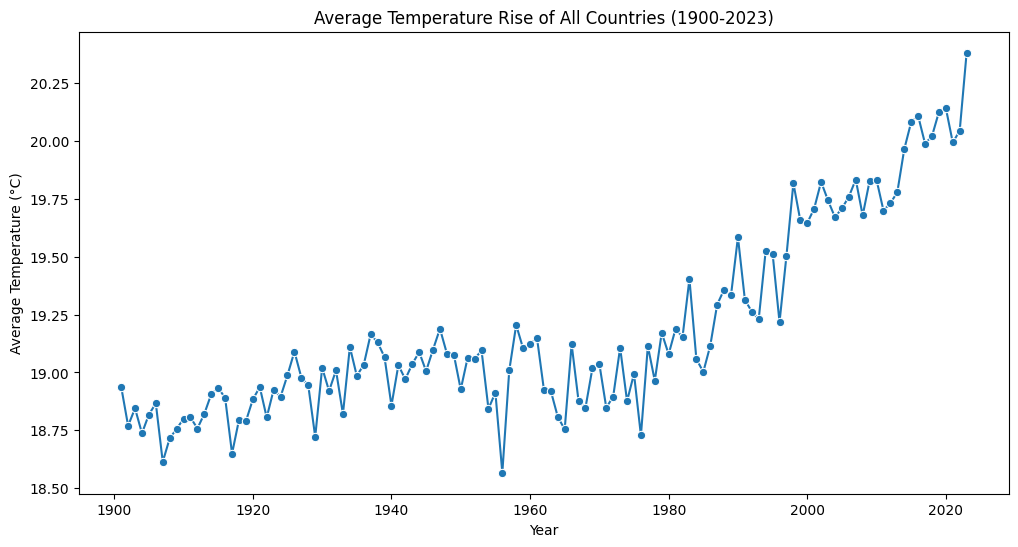

In [54]:
yearly_avgtemp_df = (
    df1.groupby("year", as_index=False)["tas"].mean()
)

plt.figure(figsize=(12, 6)) 
sns.lineplot(data=yearly_avgtemp_df, 
             x='year', 
             y='tas', marker='o')
plt.title('Average Temperature Rise of All Countries (1900-2023)') 
plt.xlabel('Year') 
plt.ylabel('Average Temperature (°C)') 

plt.show()
